In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
def euclidean_distance(a, b): # Funkcja licząca odległość euklidesową między dwoma punktami
    return np.sqrt(np.sum((a - b) ** 2))

def compute_distance_matrix(data): # Funkcja licząca odległości między wszystkie punktami
    n_samples = len(data)
    distance_matrix = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            distance_matrix[i, j] = euclidean_distance(data[i], data[j])
            distance_matrix[j, i] = distance_matrix[i, j]
    return distance_matrix

def find_closest_clusters(distance_matrix, clusters): # Funkcja szukająca dwóch najbliższych punktów
    min_distance = float('inf')
    closest_pair = None
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            distances = [distance_matrix[p1, p2] for p1 in clusters[i] for p2 in clusters[j]]
            max_distance = max(distances)
            if max_distance < min_distance:
                min_distance = max_distance
                closest_pair = (i, j)
    return closest_pair

def agglomerative_clustering(data, num_clusters): # Funkcja łącząca najbliższe punkty (grupy punktów) w co raz większe klastry
    clusters = [[i] for i in range(len(data))]
    distance_matrix = compute_distance_matrix(data)
    while len(clusters) > num_clusters:
        i, j = find_closest_clusters(distance_matrix, clusters)
        clusters[i] = clusters[i] + clusters[j]
        del clusters[j]
    return clusters

def plot_clusters(data, clusters): # Funkcja tworząca wykres z punktami podzielonymi kolorami na klastry
    for idx, cluster in enumerate(clusters):
        cluster_points = data[cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {idx + 1}')
    plt.title('Agglomerative Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

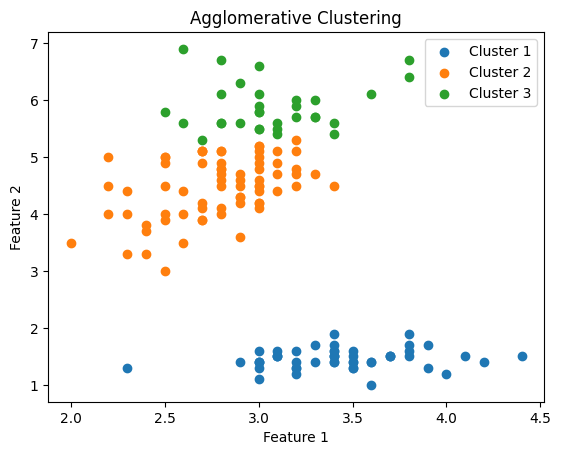

In [4]:
iris = load_iris() # Dodanie danych Iris
data = iris.data[:, [1, 2]]

num_clusters = 3 # Liczba klastrów

clusters = agglomerative_clustering(data, num_clusters) # Podział na klastry za pomocą Agglomerative Clustering

plot_clusters(data, clusters) # Podgląd podziału na klastry